In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib import pyplot as plt
import plotly.express as px
import tqdm

In [ ]:
my_random_state = 12345

In [ ]:
X, y = make_blobs(n_samples=500,
                  centers=2,
                  random_state = my_random_state,
                  cluster_std=8
                  )

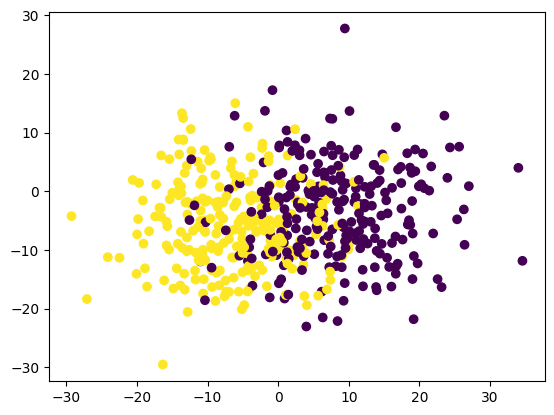

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y)

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,
                                                     y,
                                                     stratify = y,
                                                     random_state=my_random_state)

In [ ]:
np.mean(y), np.mean(y_train), np.mean(y_test)

(np.float64(0.5), np.float64(0.5013333333333333), np.float64(0.496))

# Построим максимальное дерево

In [ ]:
# ?DecisionTreeClassifier

In [ ]:
maxtree = DecisionTreeClassifier(random_state=my_random_state,
                                 max_depth=None)

In [ ]:
maxtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12345)

In [ ]:
maxtree.score(X_train, y_train), maxtree.score(X_test, y_test)

(1.0, 0.776)

# Бэггинг

In [ ]:
?BaggingClassifier

In [ ]:
bag = BaggingClassifier(estimator=maxtree,
                        n_estimators=100,
                        random_state=my_random_state,
                        max_samples=0.3)

In [ ]:
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=12345),
                  max_samples=0.3, n_estimators=100, random_state=12345)

In [ ]:
bag.score(X_train, y_train), bag.score(X_test, y_test)

(0.8693333333333333, 0.856)

# Random Forest

In [ ]:
# ?RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=my_random_state,
                            max_samples=0.3)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.3, random_state=12345)

In [ ]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8693333333333333, 0.848)

In [ ]:
accuracy_dict = {}
for n in tqdm.tqdm(range(10, 150, 30), desc="Progress"):
  rf = RandomForestClassifier(n_estimators=n,
                              random_state=my_random_state,
                              max_samples=0.3)
  scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
  avg_accuracy = np.mean(scores)
  accuracy_dict[n] = avg_accuracy

Progress: 100%|██████████| 5/5 [00:11<00:00,  2.36s/it]


In [ ]:
accuracy_dict

{10: np.float64(0.7653333333333332),
 40: np.float64(0.784),
 70: np.float64(0.792),
 100: np.float64(0.7973333333333333),
 130: np.float64(0.7893333333333332)}

In [ ]:
px.line(x=accuracy_dict.keys(), y=accuracy_dict.values(), labels={'y':'Accuarcy','x':'number of trees' })

# Оптимальное дерево

In [ ]:
# ?DecisionTreeClassifier

In [ ]:
tree_params = {'criterion':['entropy', 'gini'],
               'max_depth':[5, 7, 10, 15],
               'ccp_alpha':[0.01, 0.05, 0.1, 0.5, 1]}

In [ ]:
best_accuracy = 0
for criterion in tree_params['criterion']:
  for max_depth in tree_params['max_depth']:
    for ccp_alpha in tree_params['ccp_alpha']:
      dtree = DecisionTreeClassifier(criterion=criterion,
                                     max_depth=max_depth,
                                     ccp_alpha=ccp_alpha,
                                     random_state=my_random_state,
                                     )
      scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
      avg_accuracy = np.mean(scores)
      if avg_accuracy>best_accuracy:
        best_accuracy = avg_accuracy
        best_params = {'criterion':criterion,
                        'max_depth':max_depth,
                        'ccp_alpha':ccp_alpha}

In [ ]:
best_params

{'criterion': 'entropy', 'max_depth': 5, 'ccp_alpha': 0.05}

In [ ]:
best_tree = DecisionTreeClassifier(**best_params)

In [ ]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=5)

In [ ]:
best_tree.score(X_train, y_train), best_tree.score(X_test, y_test)

(0.8266666666666667, 0.872)